In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import time

(99, 3) (3,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


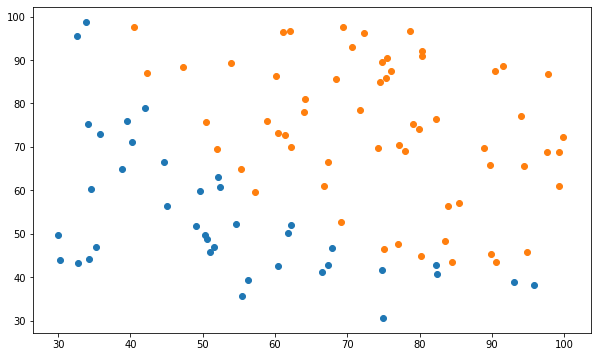

In [36]:
url = 'https://raw.githubusercontent.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt'     # Andrew Ng logistic regression dataset
columns = ['exam1','exam2','admission']

dataset = pd.read_csv(url).to_numpy()
df = pd.DataFrame(data=dataset,columns=columns)
X = np.hstack((np.ones(shape=(len(df),1)),df.iloc[:,:2]))
T = np.zeros(df.columns.size)
m = len(X)
total_iters = 0
lr = 1e-2

not_admitted = df[df.admission == 0]
admitted = df[df.admission == 1]

Y = df.admission

plt.figure(figsize=(10,6))
plt.scatter(not_admitted.exam1,not_admitted.exam2)
plt.scatter(admitted.exam1,admitted.exam2)

print(X.shape,T.shape)
# Plot initial gradient
x = [np.min(X[:, 1]), np.max(X[:, 2])]
y = -(T[0] + T[2] * np.array(x)) / T[1]
plt.plot(x,y)

\begin{gathered}
\text{Gradient descent implementation:}\\
\theta:=\theta - \frac{\alpha}{m}X^T(g(X\theta)-\vec{y}),
\text{where }\textbf{g(z)} = \frac{1}{1+e^{-z}}\\\\
\text{Cost function: }\\
J(\theta)=\frac{1}{m}\cdot(-y^Tlog(h)-(1-y)^Tlog(1-h))\\
\nabla J(\theta)=\frac{1}{m}\cdot X^T\cdot (g(X\theta)-\vec{y})
\end{gathered}

In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [38]:
def calculateCost(T):
    hypot = sigmoid(X @ T)
    cost = (-Y.T @ np.log(hypot) - (1 - Y).T @ np.log(1 - hypot)) / m
    return cost

calculateCost(T)

0.6931471805599453

In [0]:
def gradDescent(iter = 10000,threshold = 5e-5):
    global X,Y,T,m,lr,total_iters
    i = 0
    exp = 2
    cost = calculateCost(T)
    prev_cost = cost
    cost_hist = [cost]
    while i < iter:
        gradient = X.T @ (sigmoid(X @ T) - Y)
        T -= (lr / m) * gradient
        cost = calculateCost(T)

        if abs(cost - prev_cost) < threshold:
            return

        if(cost > prev_cost):
            print(f"Learning rate too large ({cost} > {prev_cost}), adjusting learning rate from {lr} to {lr * 1 / exp}")
            lr *= 1 / exp
            exp += 1
        else:
            prev_cost = cost
            cost_hist.append(cost)

        i += 1
        total_iters += 1


Epochs: 30
Total iterations: 620000
Cost: 0.2943855198414493
Learning rate: 0.00041666666666666664
Parameters: [-8.53592194  0.07298338  0.06890241]



<Figure size 432x288 with 0 Axes>

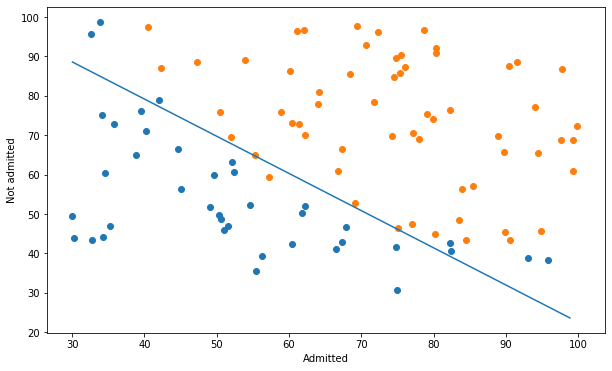

In [41]:
x = 0
eph = 30
while x <= eph:
    gradDescent(threshold=6e-15)
    x += 1

print(f"\nEpochs: {eph}")
print(f"Total iterations: {total_iters}")
print(f"Cost: {calculateCost(T)}")
print(f"Learning rate: {lr}")
print(f"Parameters: {T}\n")

x = [np.min(X[:, 1]), np.max(X[:, 2])]
y = -(T[0] + T[2] * np.array(x)) / T[1]

plt.clf()
plt.figure(figsize=(10,6))
plt.scatter(not_admitted.exam1,not_admitted.exam2)
plt.scatter(admitted.exam1,admitted.exam2)
plt.xlabel('Admitted')
plt.ylabel('Not admitted')
plt.plot(x,y)